## Homework 4

Use this notebook as a starter

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

In [17]:
!wget -O ../data/raw/CreditScoring.csv https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

--2021-10-01 18:51:33--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.109.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 182489 (178K) [text/plain]
Guardando como: “../data/raw/CreditScoring.csv”

../data/raw/CreditS 100%[===================>] 178,21K  --.-KB/s    en 0,03s   

2021-10-01 18:51:33 (6,65 MB/s) - “../data/raw/CreditScoring.csv” guardado [182489/182489]



## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [18]:
df = pd.read_csv('../data/raw/CreditScoring.csv')
df.columns = df.columns.str.lower()

Some of the features are encoded as numbers. Use the following code to de-code them:

In [19]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [20]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [21]:
print(df.status.unique())
df = df[df.status != 'unk'].reset_index(drop=True)
print(df.status.unique())


['ok' 'default' 'unk']
['ok' 'default']


Create the target variable

In [22]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

## Your code

<title>COLUMNS: </title>
<table>
<tbody>
<tr><td><b>1  Status</b></td> <td>credit status</td></tr>
<tr><td><b>2  Seniority</b></td> <td>job seniority (years)</td></tr>
<tr><td><b>3  Home</b></td> <td>type of home ownership</td></tr>
<tr><td><b>4  Time</b></td> <td>time of requested loan</td></tr>
<tr><td><b>5  Age</b></td> <td>client's age </td></tr>
<tr><td><b>6  Marital</b></td> <td>marital status </td></tr>
<tr><td><b>7  Records</b></td> <td>existance of records</td></tr>
<tr><td><b>8  Job</b></td> <td>type of job</td></tr>
<tr><td><b>9  Expenses</b></td> <td> amount of expenses</td></tr>
<tr><td><b>10 Income</b></td> <td> amount of income</td></tr>
<tr><td><b>11 Assets</b></td> <td> amount of assets</td></tr>
<tr><td><b>12 Debt</b></td> <td> amount of debt</td></tr>
<tr><td><b>13 Amount</b></td> <td> amount requested of loan</td></tr>
<tr><td><b>14 Price</b></td> <td> price of good</td></tr>
</tbody>
</table>


What are the categorical variables? What are the numerical?

In [31]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)

print(f"Categorical: {categorical_columns}")
print(f"Numerical: {numerical_columns}")
print(f"Length {df.columns.shape[0]}")


Categorical: ['home', 'marital', 'records', 'job']
Numerical: ['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'default']
Length 14


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

del df_train['default']
del df_val['default']
del df_test['default']

In [37]:
# calculate again due to before cell
categorical_columns = list(df_train.dtypes[df_train.dtypes == 'object'].index)
numerical_columns = list(df_train.dtypes[df_train.dtypes != 'object'].index)

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [52]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

auc_per_column = []

for c in numerical_columns: 
    if c not in ["seniority", "time", "income", "debt"]:
        continue
    
    fpr, tpr, thresholds = roc_curve(y_train, df_train[c])
    auc_per_column.append((c,auc(fpr, tpr)))
    
print(auc_per_column)
print("Max is: ", max(auc_per_column, key=lambda r: r[1]))



[('seniority', 0.2906221375508058), ('time', 0.5608662489595051), ('income', 0.31799333386736695), ('debt', 0.49521703242164505)]
Max is:  ('time', 0.5608662489595051)


Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [57]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [58]:
columns = ['seniority', 'income', 'assets', 'records', 'job', 'home']

In [129]:
def prepare(df, selected_columns, vect = None):
    dicts = df[selected_columns].to_dict(orient='records')

    if vect is None:
        dv = DictVectorizer(sparse=False)
        dv.fit(dicts)
    else: 
        dv = vect
    
    X = dv.transform(dicts)
    
    return X, dv

In [130]:
def train_q1(data, target, C=1.0):
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(data, target)
    return model


In [131]:
train_data, dv = prepare(df_train, columns)

In [132]:
model = train_q1(train_data, y_train)

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812


In [133]:
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(train_data)[:, 1])
round(auc(fpr, tpr),3)

0.818

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

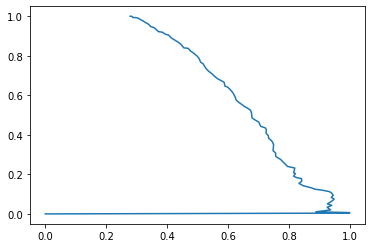

In [134]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

precision_score(y_train, model.predict(train_data))
recall_score(y_train, model.predict(train_data))
precision, recall, thresholds = precision_recall_curve(y_train,  model.predict_proba(train_data)[:, 1])

plt.plot(precision_scores, recall_scores)
# plt.plot(thresholds.tolist(), precision.tolist())
# plt.plot(thresholds, recall)

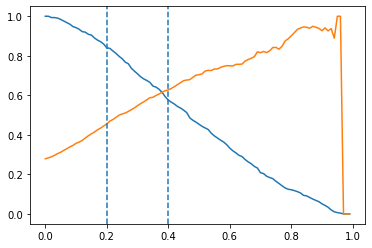

In [135]:
precision_scores=[]
recall_scores=[]

thresholds = np.arange(0.0,1.0,0.01)
for threshold in thresholds:
    precision = precision_score(y_train, model.predict_proba(train_data)[:, 1] > threshold, zero_division=0)
    recall = recall_score(y_train, model.predict_proba(train_data)[:, 1] > threshold )
    precision_scores.append(precision)
    recall_scores.append(recall)

# print(precision_scores)
plt.plot(thresholds, recall_scores)
plt.plot(thresholds, precision_scores)
plt.axvline(x=0.4, linestyle='--')
plt.axvline(x=0.2, linestyle='--')


At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [136]:
from sklearn.metrics import f1_score

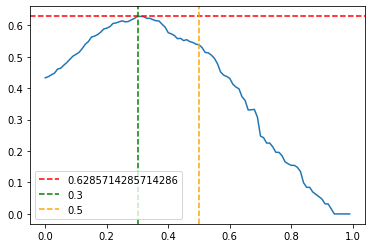

In [148]:
f1_scores = []

val_data, _ = prepare(df_val, columns, dv)
for threshold in thresholds:
    f1 = f1_score(y_val, model.predict_proba(val_data)[:, 1] > threshold)
    f1_scores.append(f1)
    
plt.plot(thresholds, f1_scores)
plt.axhline(max(f1_scores), linestyle='--', label=max(f1_scores), color="red")
plt.axvline(0.3, linestyle='--', label=0.3, color="green")
plt.axvline(0.5, linestyle='--', label=0.5, color="orange")
plt.legend()

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [150]:
from sklearn.model_selection import KFold

In [164]:
a = 5

def fan():
    a = 6
    print(a)
    
print(a)
fan()
print(a) # yisus, estoy muy quemado (Burnout)

5
6
5


In [165]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred


def train(df_train, y_train, model):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model.fit(X_train, y_train)
    
    return dv, model

In [193]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []


def pipeline(df_full_train, kfold):
    models = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.default.values
        y_val = df_val.default.values

        X_train=df_train[columns]
        X_val = df_val[columns]

        model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
        
        dv, model = train(X_train, y_train, model)
        y_pred = predict(X_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        models.append(model)
        
    return scores, models

scores, models = pipeline(df_full_train, kfold)

In [198]:
round(np.std(scores),3)

0.014

How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [199]:
def pipeline(df_full_train, kfold, model):
    models = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.default.values
        y_val = df_val.default.values

        X_train=df_train[columns]
        X_val = df_val[columns]
        
        dv, model = train(X_train, y_train, model)
        y_pred = predict(X_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        models.append(model)
        
    return scores, models

In [213]:
Cs = [0.01, 0.1, 1, 10]

grid = {
    "models":[],
    "scores":[],
    "C":[]
}

for C in Cs:
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    scores, models = pipeline(df_full_train, kfold, model)
    grid["scores"].append((np.mean(scores), np.std(scores)))
    grid["models"].append(models)
    grid["C"].append(C)
    
for score, C in zip(grid["scores"], grid["C"]):
    print(f"C:{C:10.2f}  == {score[0]:0.7f} +- {score[1]:0.5f}")

C:      0.01  == 0.8118746 +- 0.01380
C:      0.10  == 0.8119009 +- 0.01380
C:      1.00  == 0.8119091 +- 0.01379
C:     10.00  == 0.8119636 +- 0.01382


Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.